# Quantum state preparation GHZ

Update $\theta$ until it equivalent to GHZ state.

<img src='../../images/binho_checkstate.png' width = 500px/>

It looks like W state case:

<img src='../../images/check_ghz_state.png'/>

First, we import library

In [1]:
import qiskit, sys
import qiskit.quantum_info as qi
sys.path.insert(1, '../../')
from qsee.core import state, ansatz
from qsee.compilation.qcompilation import QuantumCompilation
%load_ext autoreload
%autoreload 2

Then, using compiler to optimize $\theta$

In [8]:
num_qubits = 3
num_layers = 2
compiler = QuantumCompilation(
    u = ansatz.stargraph(num_qubits, num_layers),
    vdagger = state.ghz(num_qubits).inverse(),
).fit()

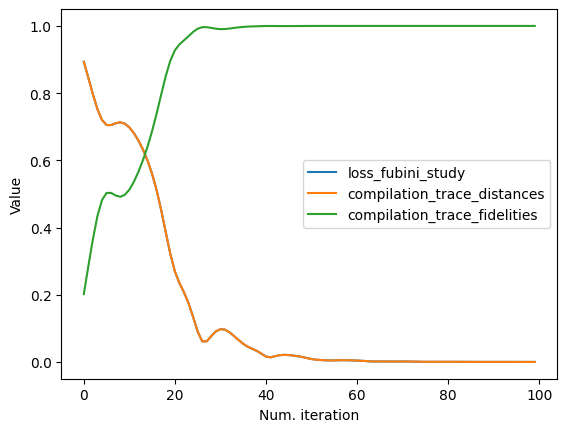

In [9]:
compiler.plot()

Finally, we can compare origin density matrix ($V$) and reconstructed density matrix ($U(\theta^*)$)

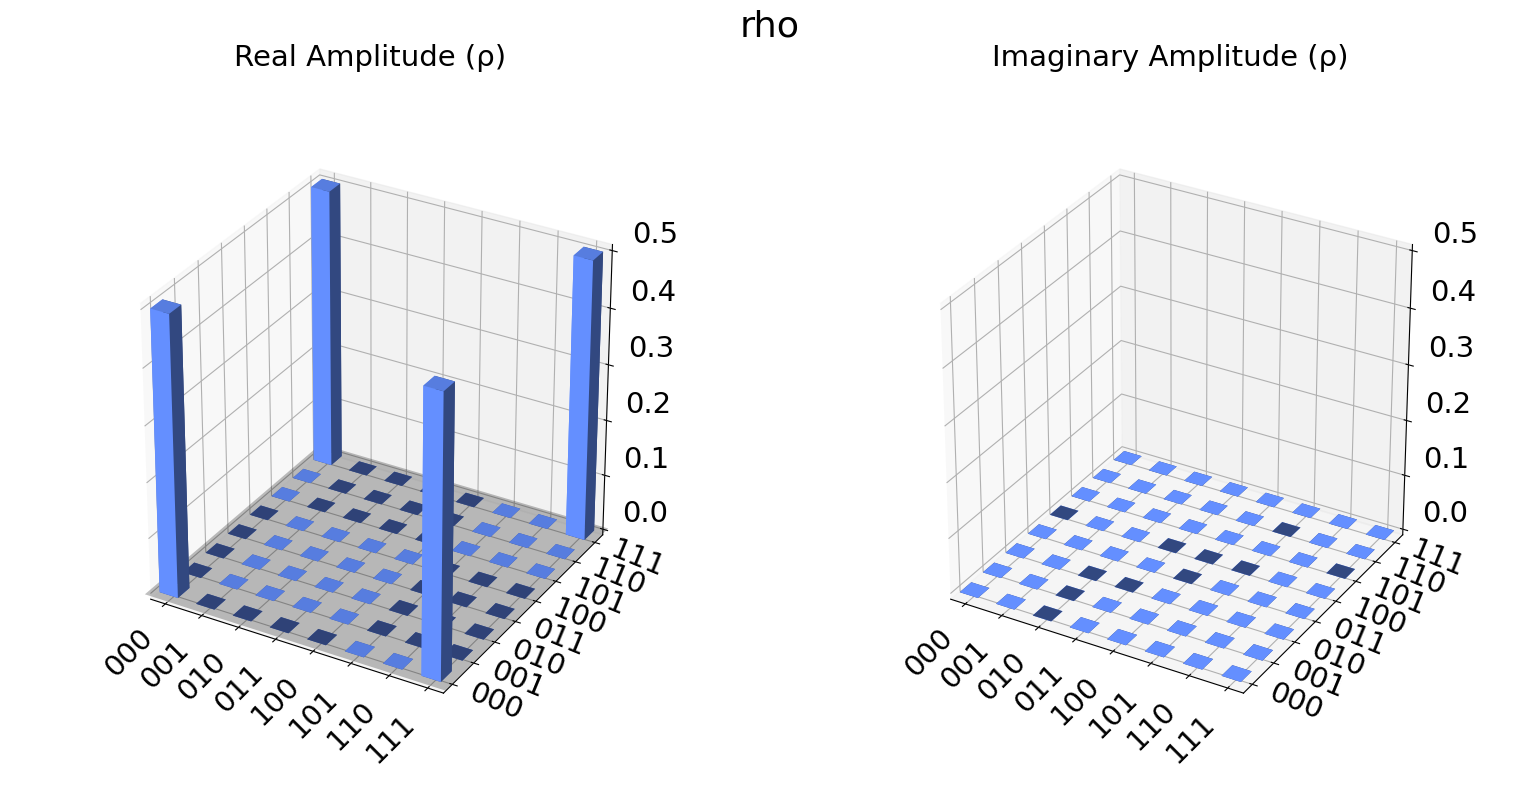

In [10]:
qc = compiler.u.assign_parameters(compiler.thetas)
rho = qi.DensityMatrix.from_instruction(qc)
sigma = qi.DensityMatrix.from_instruction(compiler.vdagger.inverse())
qiskit.visualization.plot_state_city(rho, title = 'rho')

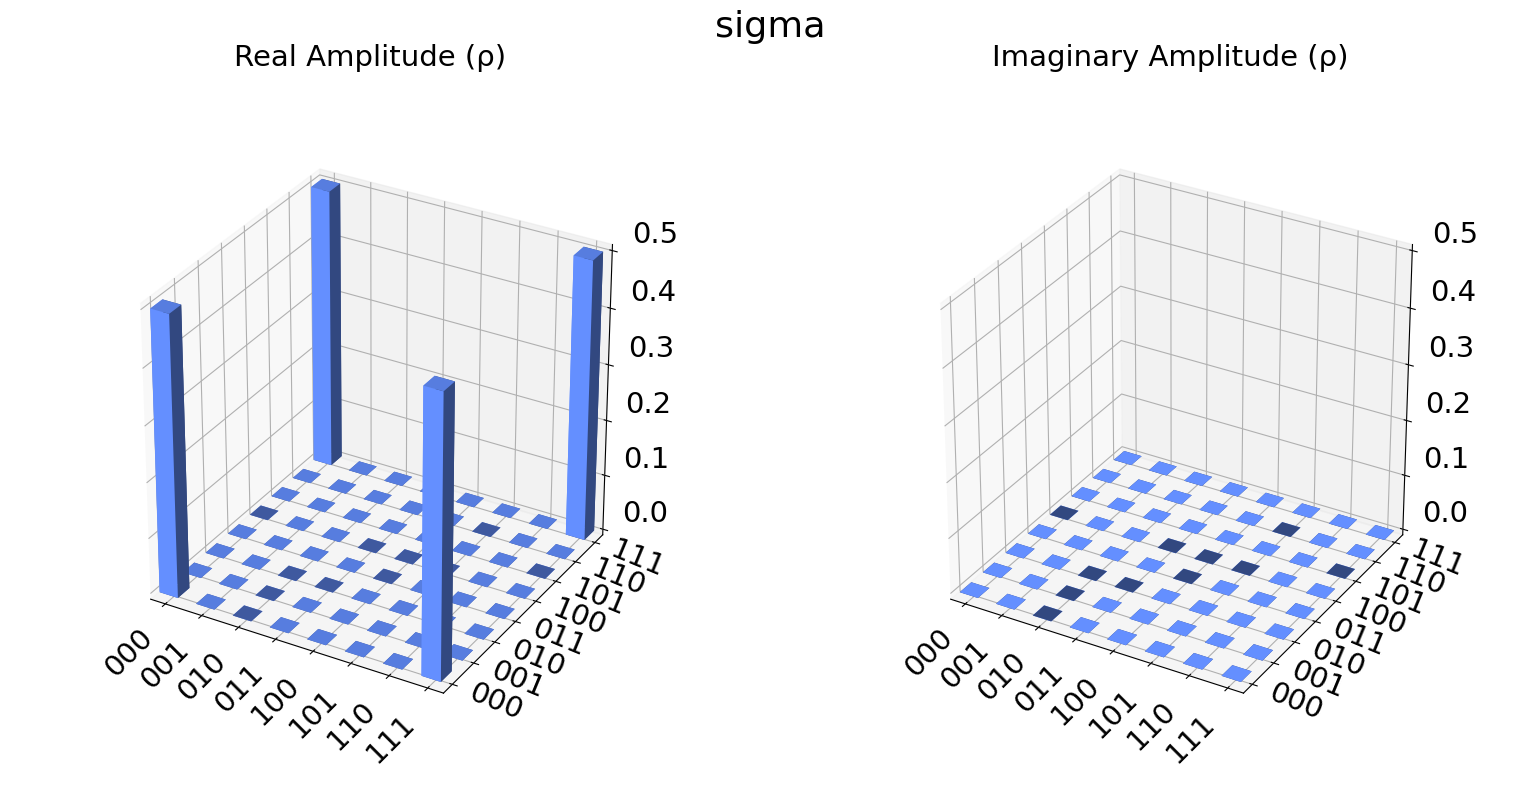

In [11]:
qiskit.visualization.plot_state_city(sigma, title = 'sigma')